In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\data.csv")


In [3]:
df.head() 

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [6]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [7]:
# Check the sum of Missing Values per column
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [8]:
# Check the Percentage of Missing Values
df.isnull().sum()/len(df)*100

Age                               0.0
Education_Level                   0.0
Occupation                        0.0
Number_of_Dependents              0.0
Location                          0.0
Work_Experience                   0.0
Marital_Status                    0.0
Employment_Status                 0.0
Household_Size                    0.0
Homeownership_Status              0.0
Type_of_Housing                   0.0
Gender                            0.0
Primary_Mode_of_Transportation    0.0
Income                            0.0
dtype: float64

In [9]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.0217,1.520400e+01,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.5270,1.713991e+00,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.8588,1.465262e+01,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.9896,2.010496e+00,1.0,2.0,4.0,6.0,7.0
Income,10000.0,816838.1667,1.821089e+06,31044.0,68446.0,72943.0,350667.5,9992571.0


In [11]:
df.describe(include ="object").T

,count,unique,top,freq
Education_Level,10000,4,Bachelor's,4058
Occupation,10000,5,Healthcare,3035
Location,10000,3,Urban,7037
Marital_Status,10000,3,Married,5136
Employment_Status,10000,3,Full-time,5004
Homeownership_Status,10000,2,Own,6018
Type_of_Housing,10000,3,Single-family home,4055
Gender,10000,2,Male,5123
Primary_Mode_of_Transportation,10000,4,Public transit,4047


In [12]:
df.columns.dtype

dtype('O')

In [13]:
##Categorical features
object_col = df.loc[:,df.dtypes == object].columns
object_col

Index(['Education_Level', 'Occupation', 'Location', 'Marital_Status',
       'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
       'Gender', 'Primary_Mode_of_Transportation'],
      dtype='object')

In [14]:
for col in object_col:
    print(col)
    print("---"*8)
    print(df[col].value_counts(dropna = False))
    print("---"*20)
    

Education_Level
------------------------
Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64
------------------------------------------------------------
Occupation
------------------------
Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64
------------------------------------------------------------
Location
------------------------
Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64
------------------------------------------------------------
Marital_Status
------------------------
Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64
------------------------------------------------------------
Employment_Status
------------------------
Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64
--------------------

In [15]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 9
Categorical Features:  ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']


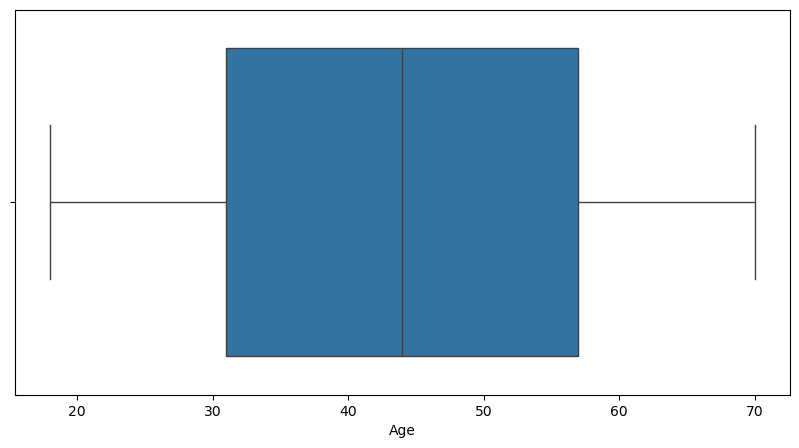

In [16]:
plt.figure(figsize=(10,5)) ## Income Targeted feature Uni variant and multi variant analysis
sns.boxplot(x="Age",data=df);

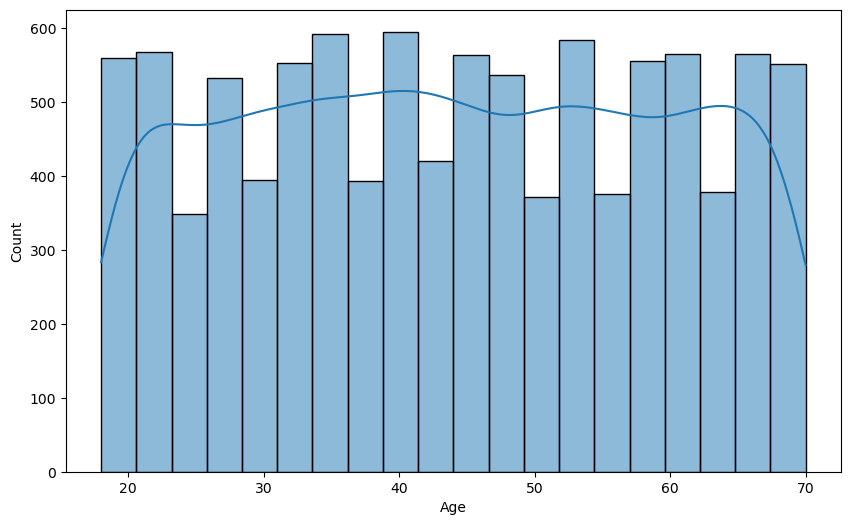

In [17]:
##Check the histplot/kdeplot to see distribution of feature
plt.figure(figsize=(10,6))
sns.histplot(x="Age",data=df,kde=True,bins=20);


In [18]:
##Check the statistical values##
df.Age.describe()

count    10000.000000
mean        44.021700
std         15.203998
min         18.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         70.000000
Name: Age, dtype: float64

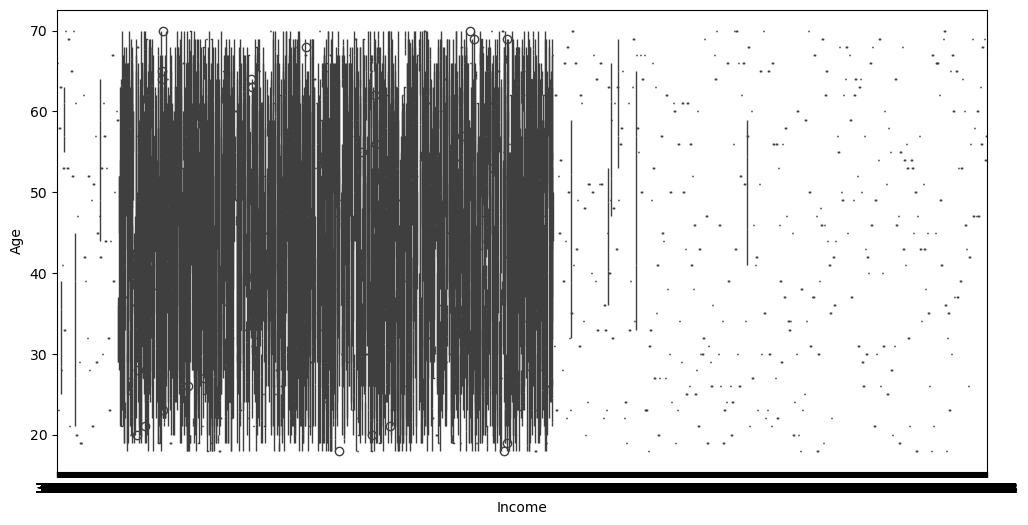

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Income",y="Age",data=df);

In [20]:
df.Age.describe()

count    10000.000000
mean        44.021700
std         15.203998
min         18.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         70.000000
Name: Age, dtype: float64

In [21]:
df.columns


Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

<Axes: xlabel='Income', ylabel='count'>

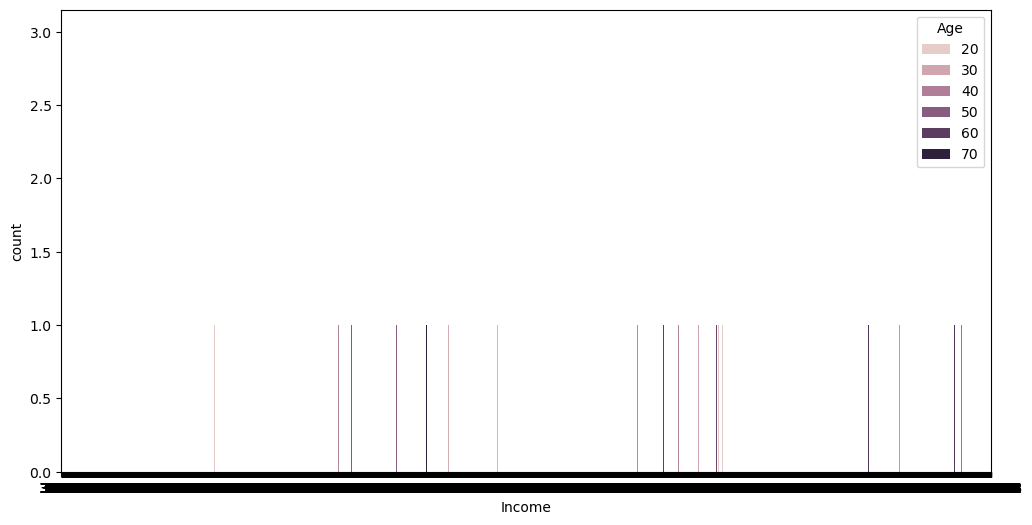

In [22]:

fig,ax = plt.subplots(figsize=(12,6))

sns.countplot(x="Income",data=df,hue="Age")



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number_of_Dependents'}>],
       [<Axes: title={'center': 'Work_Experience'}>,
        <Axes: title={'center': 'Household_Size'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

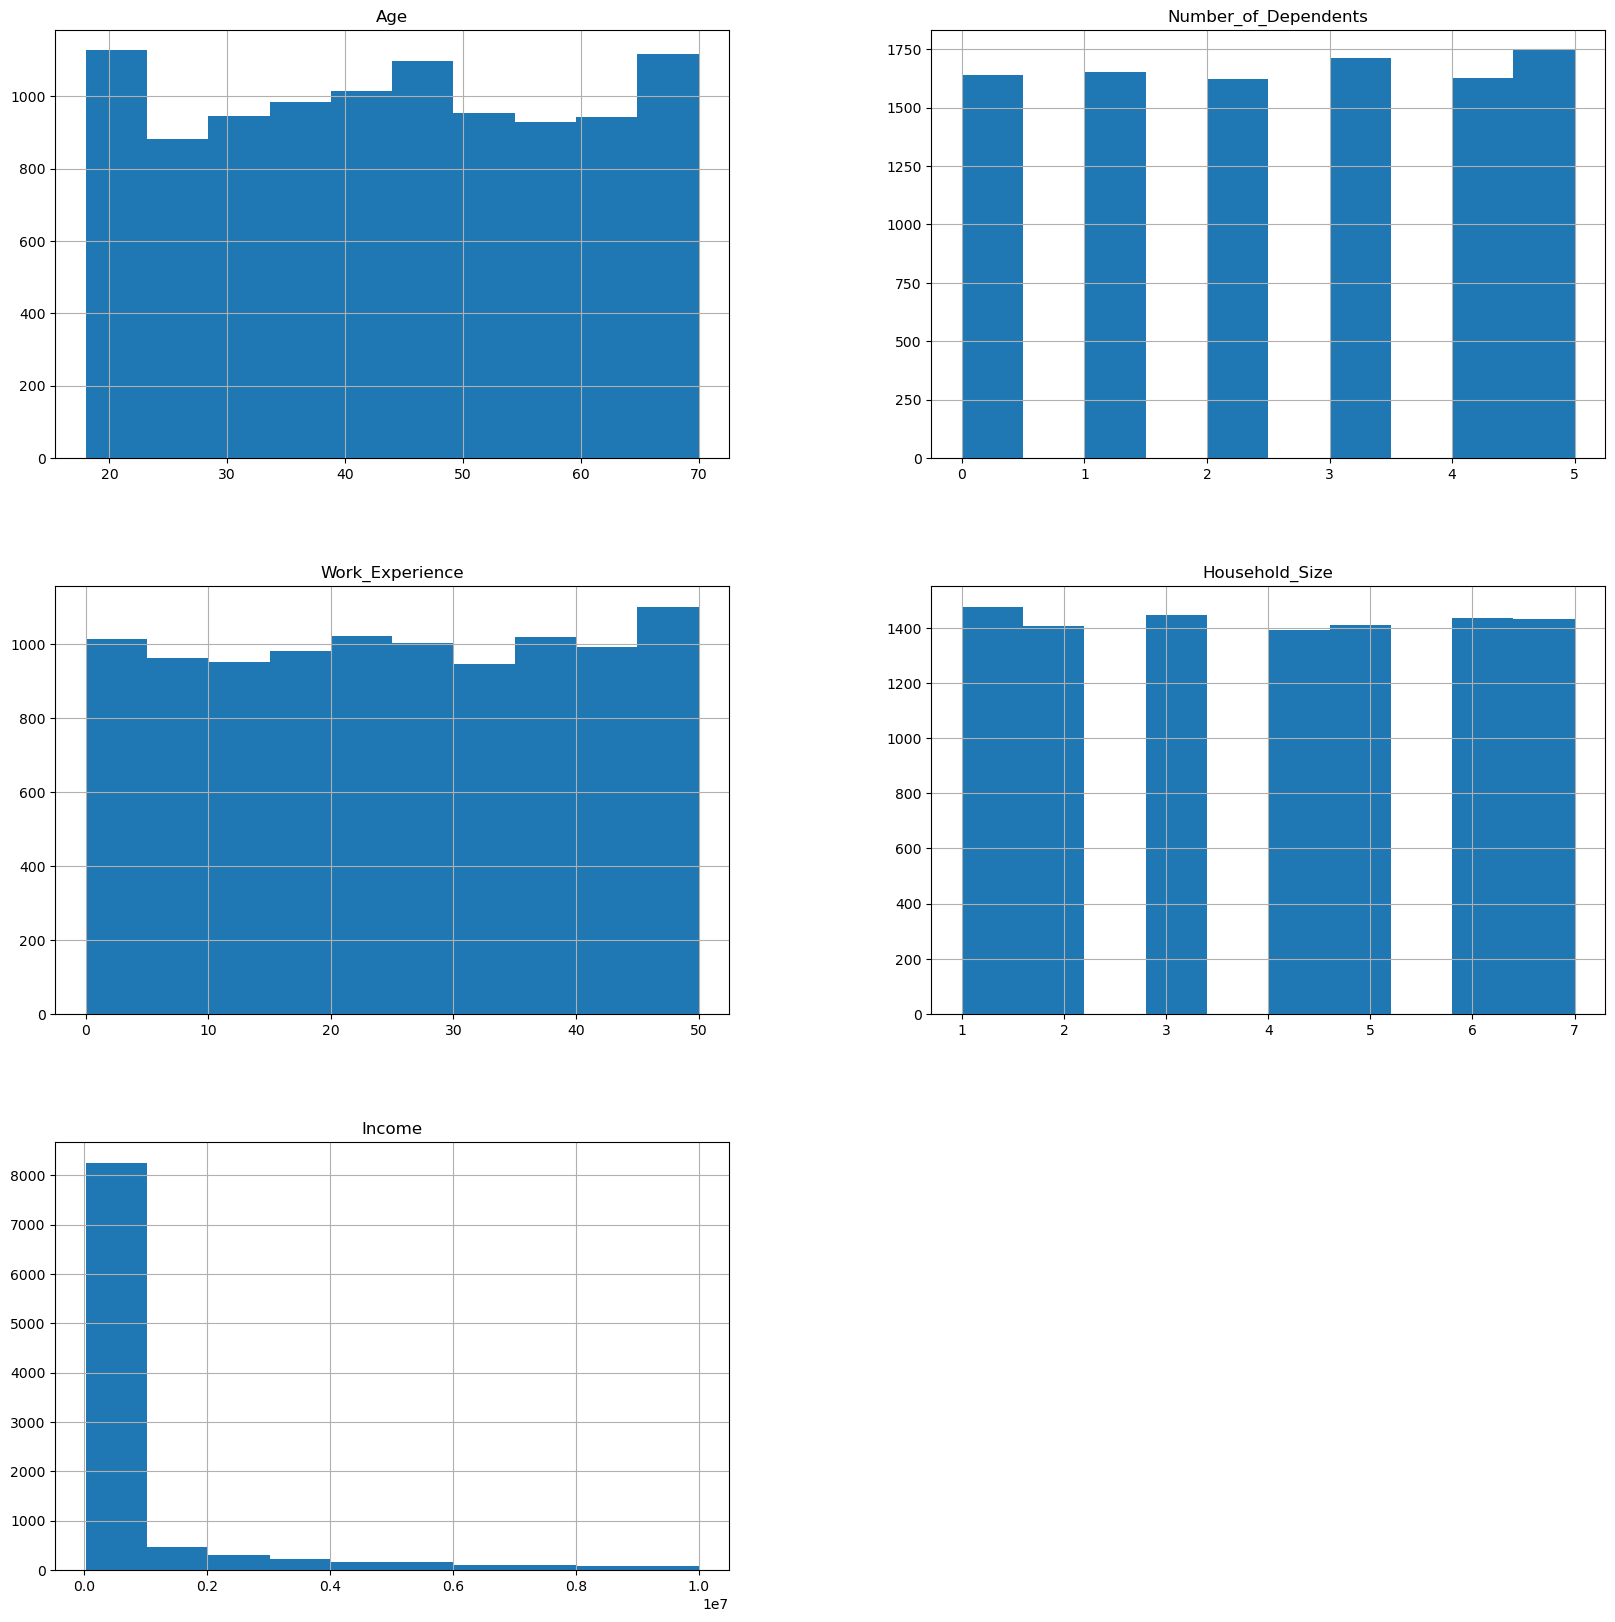

In [23]:
num_features = ['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents', 'Location', 'Work_Experience', 'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation', 'Income']
df[num_features].hist(bins=10,figsize=(20,20)) 

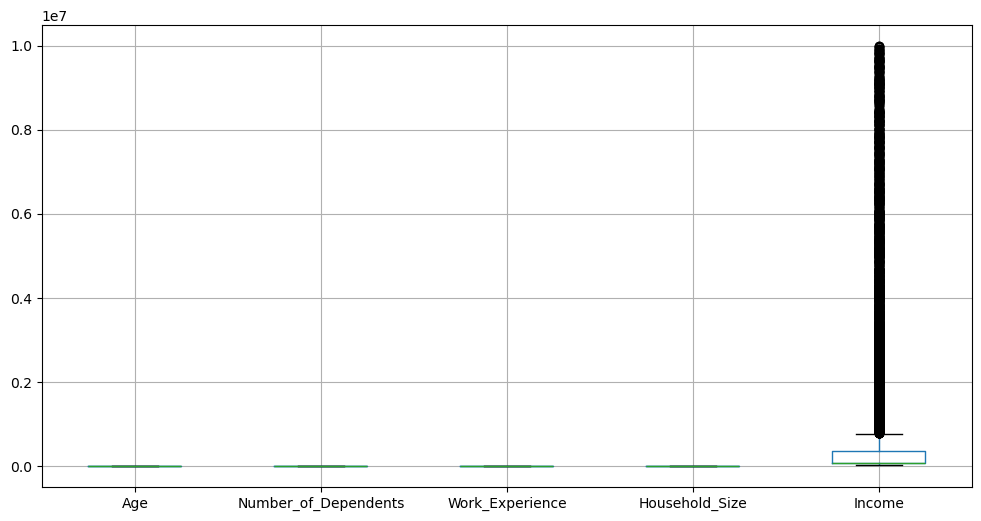

In [24]:
##Boxplot and Histplot for all numeric features
df.boxplot(figsize=(12,6));

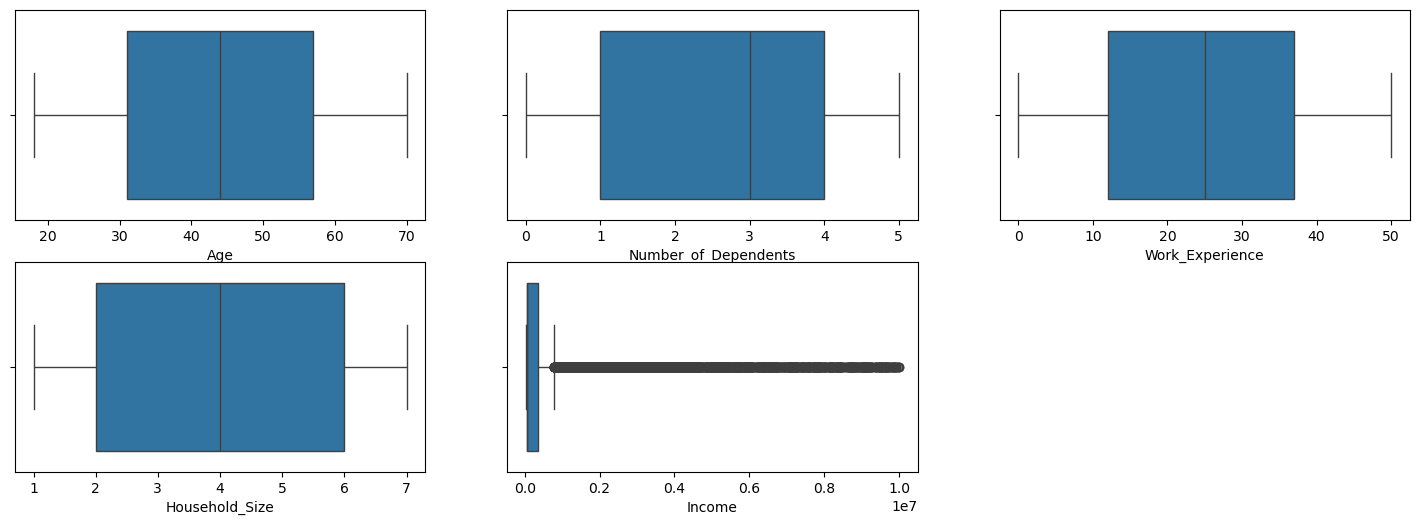

In [25]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,6))
sns.boxplot(ax=ax[0, 0], data=df, x='Age')
sns.boxplot(ax=ax[0, 1], data=df, x='Number_of_Dependents')
sns.boxplot(ax=ax[0, 2], data=df, x='Work_Experience')
sns.boxplot(ax=ax[1, 0], data=df, x='Household_Size')
sns.boxplot(ax=ax[1, 1], data=df, x='Income')

ax[1,2].axis("off");

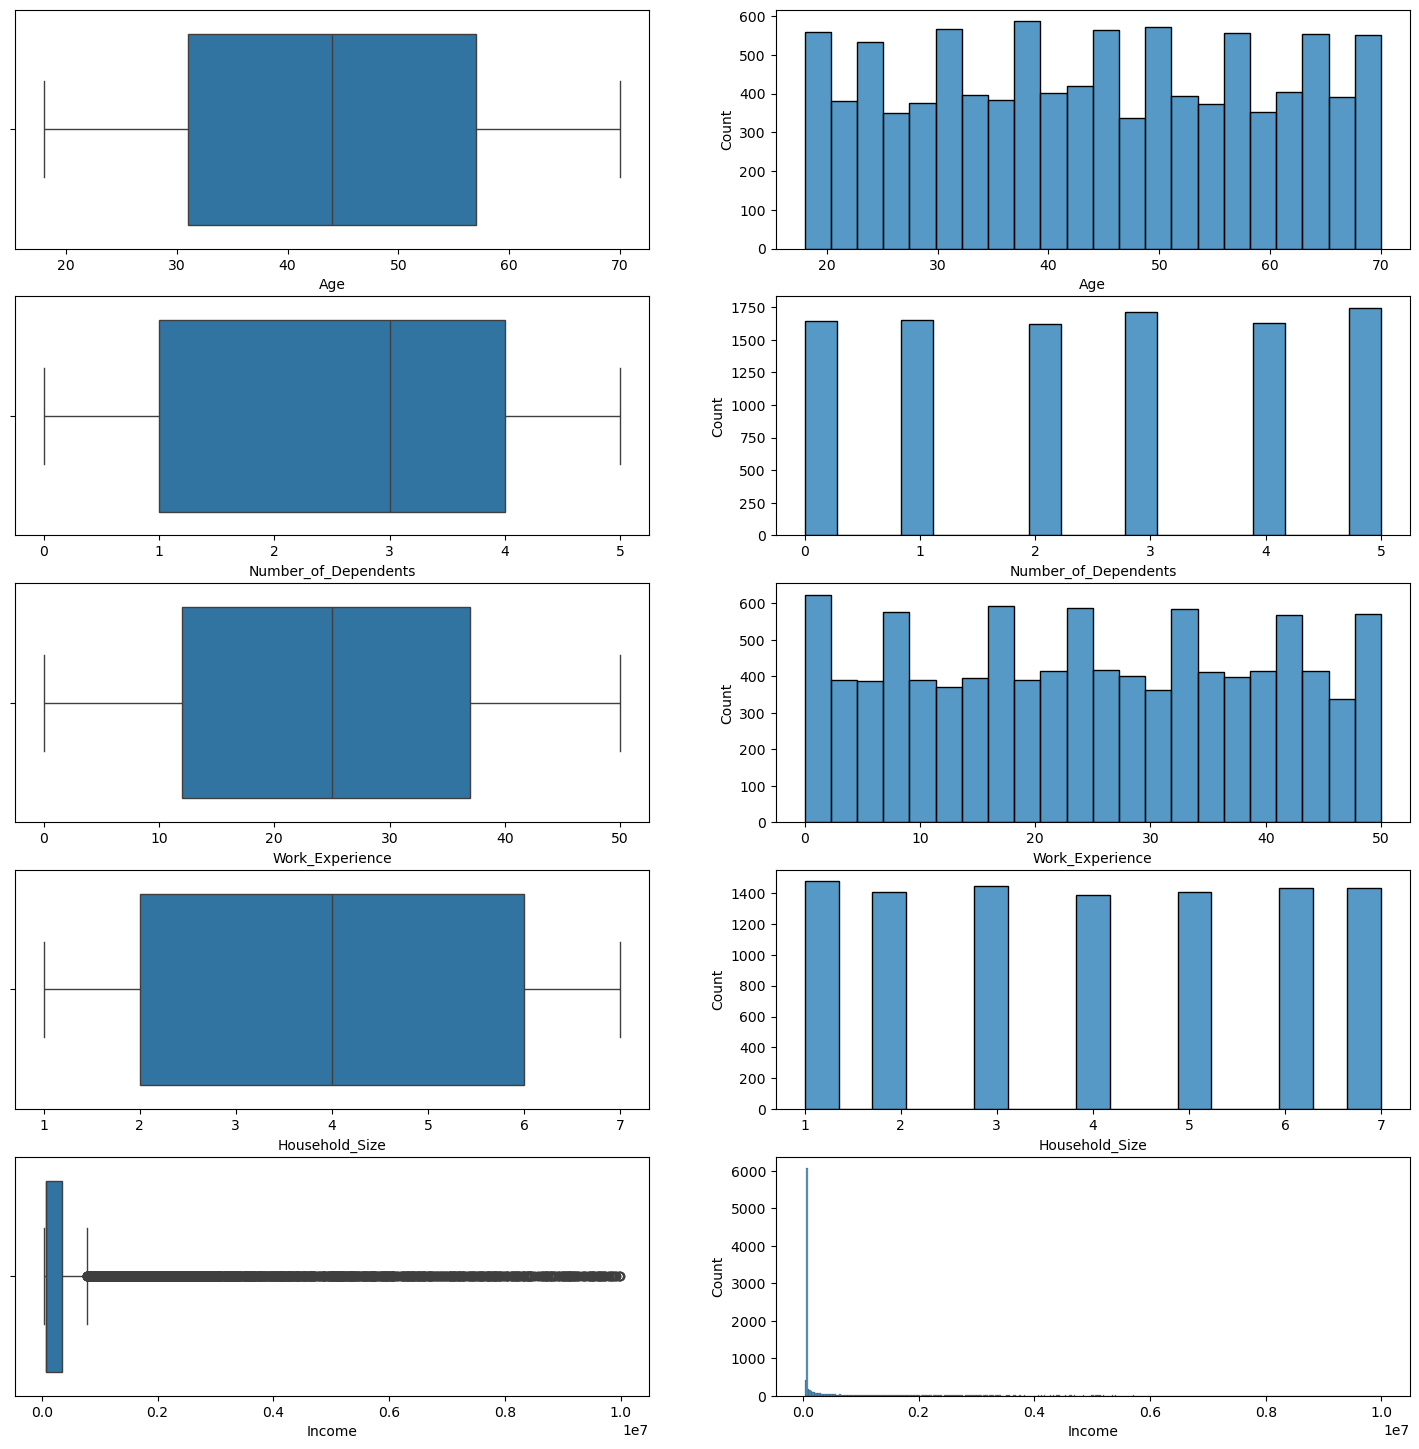

In [26]:
##Plot both boxplots and histograms for each numeric features at the same figure as subplots
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(18,18))

sns.boxplot(ax=ax[0, 0], data=df, x='Age')
sns.histplot(ax=ax[0, 1], data=df, x='Age')
sns.boxplot(ax=ax[1, 0], data=df, x='Number_of_Dependents')
sns.histplot(ax=ax[1, 1], data=df, x='Number_of_Dependents')
sns.boxplot(ax=ax[2, 0], data=df, x='Work_Experience')
sns.histplot(ax=ax[2, 1], data=df, x='Work_Experience')
sns.boxplot(ax=ax[3, 0], data=df, x='Household_Size')
sns.histplot(ax=ax[3, 1], data=df, x='Household_Size')
sns.boxplot(ax=ax[4, 0], data=df, x='Income')
sns.histplot(ax=ax[4, 1], data=df, x='Income');

In [27]:
##Check the statistical values for all numeric features
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.0217,1.520400e+01,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.5270,1.713991e+00,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.8588,1.465262e+01,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.9896,2.010496e+00,1.0,2.0,4.0,6.0,7.0
Income,10000.0,816838.1667,1.821089e+06,31044.0,68446.0,72943.0,350667.5,9992571.0


In [28]:
##1. After analyzing all features, we have decided that we can't evaluate extreme values in "Number_of_Dependent, Work_Experience,Household_Size " features in the scope of outliers.

##2. So let's examine "Age and Income" features and detect extreme values which could be outliers by using IQR Rule.

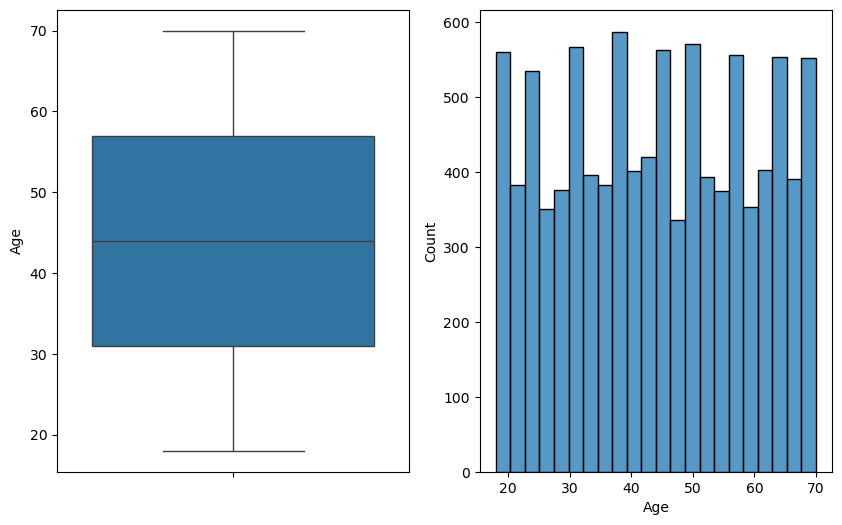

In [29]:
##Age
fig,ax = plt.subplots(ncols=2,figsize=(10,6))

sns.boxplot(ax=ax[0], data=df, y='Age')
sns.histplot(ax=ax[1], data=df, x='Age');

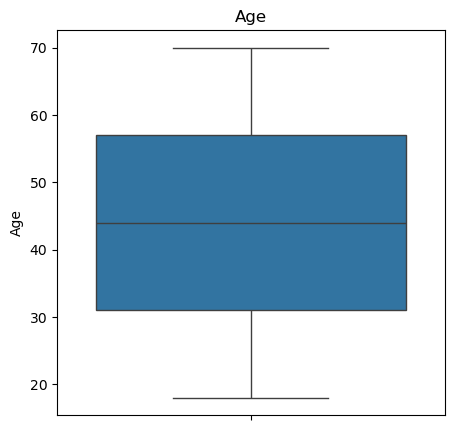

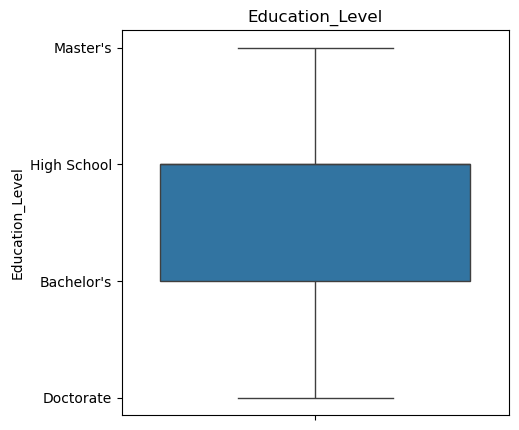

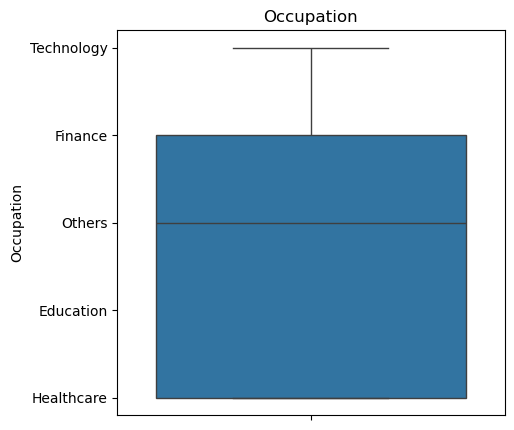

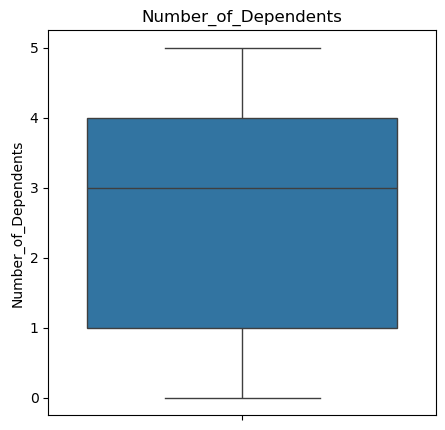

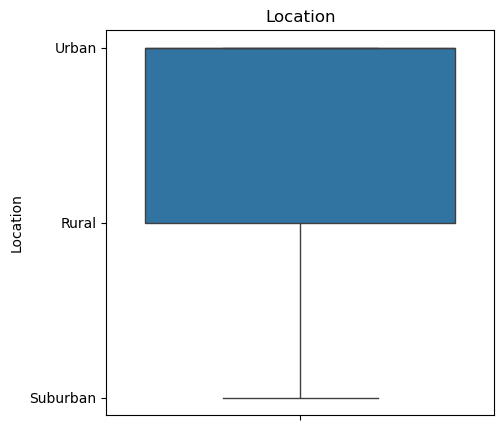

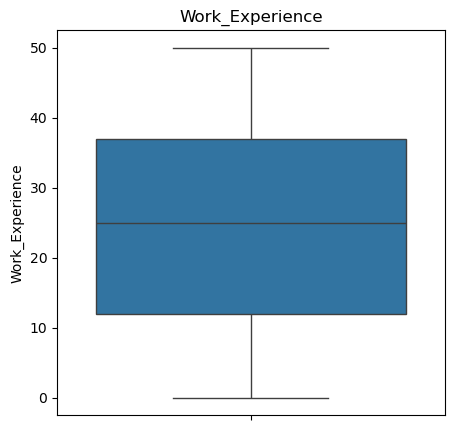

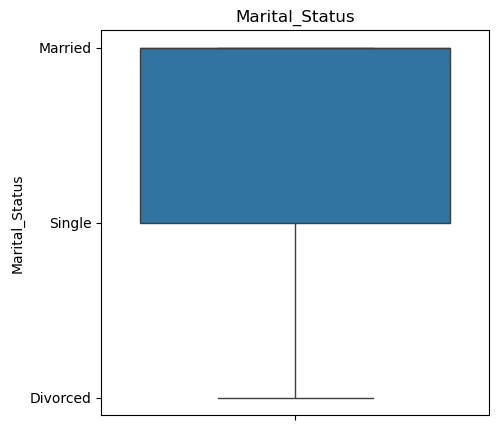

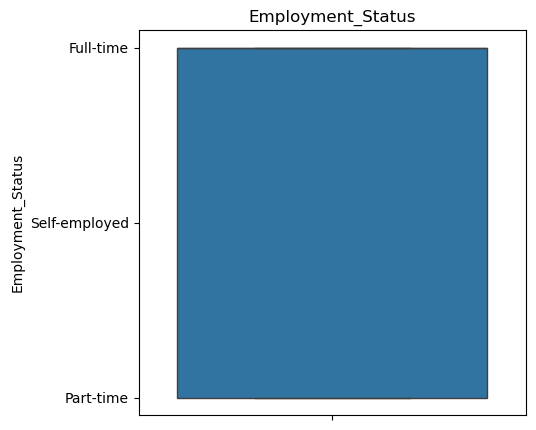

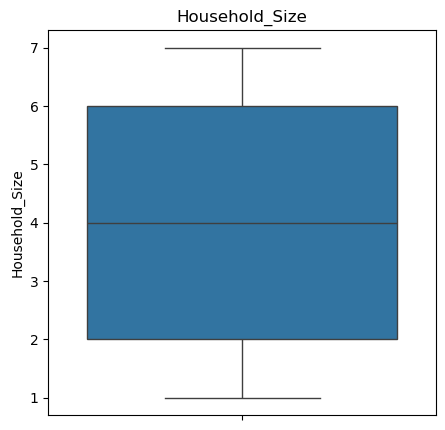

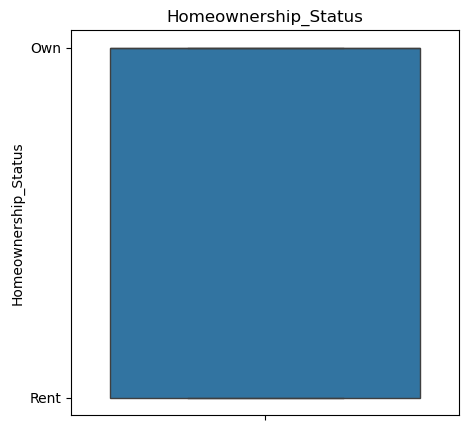

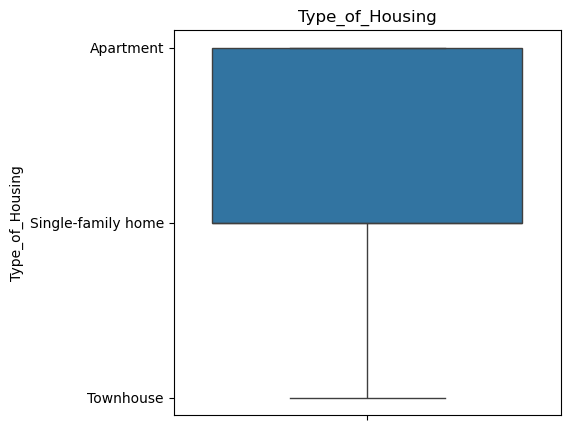

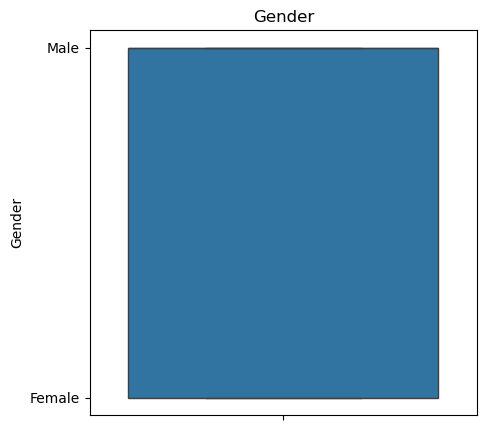

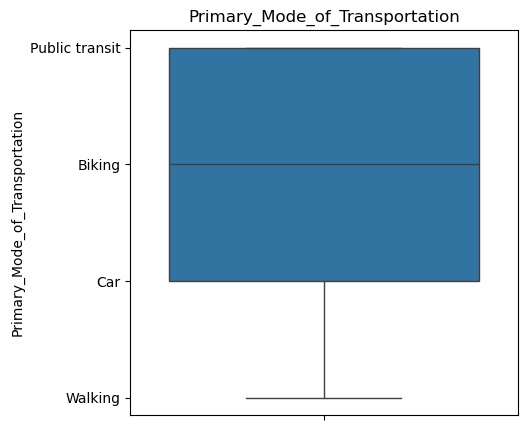

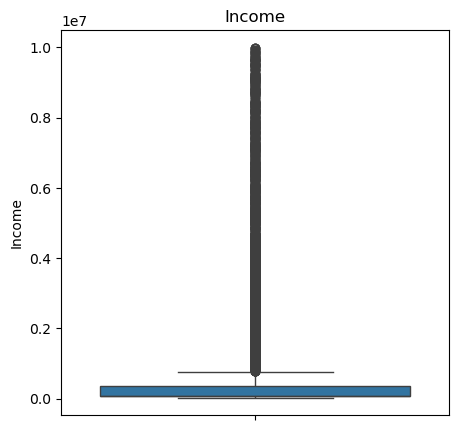

In [30]:

##checking outliers in numeric feature
for feature in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

In [31]:
df[df.columns].describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [32]:
# Find IQR defining quantile 0.25 for low level and 0.75 for high level 

Q1 = df.Age.quantile(0.25)
Q3 =df.Age.quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(31.0, 57.0, 26.0)

In [33]:
# Find lower and upper limit using IQR

lower_lim_age= Q1 - 1.5*IQR
upper_lim_age= Q3 + 1.5*IQR

lower_lim_age,upper_lim_age

(-8.0, 96.0)

In [34]:
#  It cannot be a negative age value, we need to set lower to 0.

lower_lim_age= 0
upper_lim_age= Q3 + 1.5*IQR
lower_lim_age,upper_lim_age

(0, 96.0)

In [35]:
df.Age.value_counts().tail(14)

Age
70    182
69    178
26    177
18    176
31    175
65    175
67    174
27    174
58    173
63    169
60    162
24    161
44    159
48    153
Name: count, dtype: int64

In [36]:
# Define the observations whose age is greater than upper limit and sort these observations by age in descending order

df.loc[(df.Age >= upper_lim_age)].sort_values(by=["Age"],ascending=False)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income


In [37]:
##Convert all features to numeric by using get_dummies function
pd.get_dummies(df,drop_first=True)

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income,Education_Level_Doctorate,Education_Level_High School,Education_Level_Master's,Occupation_Finance,Occupation_Healthcare,...,Marital_Status_Single,Employment_Status_Part-time,Employment_Status_Self-employed,Homeownership_Status_Rent,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Male,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
0,56,5,21,7,72510,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,69,0,4,7,75462,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,46,1,1,7,71748,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
3,32,2,32,1,74520,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,60,3,15,4,640210,False,False,False,True,False,...,False,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,26,6,74994,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
9996,23,3,16,1,72676,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
9997,41,3,50,4,2684820,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
9998,44,0,3,1,57955,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False


In [38]:
# What's the shape of dataframe

df.shape

(10000, 14)

In [39]:
# What's the shape of dataframe created by dummy operation

pd.get_dummies(df,drop_first=True).shape

(10000, 25)

In [40]:
df_corr =pd.get_dummies(df,drop_first=True).corr()
df_corr

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income,Education_Level_Doctorate,Education_Level_High School,Education_Level_Master's,Occupation_Finance,Occupation_Healthcare,...,Marital_Status_Single,Employment_Status_Part-time,Employment_Status_Self-employed,Homeownership_Status_Rent,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Male,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
Age,1.000000,0.001181,0.000310,0.010565,0.008739,-0.002077,-0.011416,-0.009576,-0.008766,0.006297,...,-0.007506,-0.005825,-0.003994,-0.010177,-0.005801,-0.003876,-0.009595,0.003122,0.016579,-0.015629
Number_of_Dependents,0.001181,1.000000,-0.000708,-0.006419,0.011413,-0.003217,0.003657,0.003510,-0.010010,-0.006909,...,-0.005060,-0.005140,0.006961,-0.015317,-0.004157,-0.008476,0.005857,-0.011809,-0.000924,0.020137
Work_Experience,0.000310,-0.000708,1.000000,0.006007,-0.027541,-0.016089,0.023936,-0.005554,0.005379,0.016040,...,-0.014291,0.013917,0.007854,-0.016434,-0.004760,0.000802,0.000797,-0.007641,0.010755,-0.012770
Household_Size,0.010565,-0.006419,0.006007,1.000000,-0.011356,-0.003600,0.007931,0.007578,0.001364,-0.015193,...,-0.007490,-0.010256,0.008312,-0.013879,-0.007175,0.013351,0.002814,0.020548,-0.003437,-0.001855
Income,0.008739,0.011413,-0.027541,-0.011356,1.000000,-0.023726,0.018451,-0.005192,-0.025784,-0.006380,...,-0.009057,0.031925,-0.011982,0.062561,-0.010527,-0.018225,-0.002218,-0.012069,0.002874,0.002310
Education_Level_Doctorate,-0.002077,-0.003217,-0.016089,-0.003600,-0.023726,1.000000,-0.148880,-0.131956,0.004587,0.004932,...,0.013731,-0.015083,-0.007130,0.002343,-0.005747,-0.003932,-0.007944,0.013423,-0.003507,0.008377
Education_Level_High School,-0.011416,0.003657,0.023936,0.007931,0.018451,-0.148880,1.000000,-0.372482,-0.008682,0.003309,...,0.001343,0.003611,0.007212,0.009723,-0.002175,-0.013414,0.021084,-0.014628,0.017181,-0.004972
Education_Level_Master's,-0.009576,0.003510,-0.005554,0.007578,-0.005192,-0.131956,-0.372482,1.000000,-0.007408,-0.004173,...,-0.008059,0.008287,-0.008386,0.005518,0.004031,-0.007313,-0.014139,-0.002593,-0.005408,-0.003738
Occupation_Finance,-0.008766,-0.010010,0.005379,0.001364,-0.025784,0.004587,-0.008682,-0.007408,1.000000,-0.280017,...,0.000143,-0.002994,0.004223,-0.000713,0.008845,0.006003,0.012099,0.004033,0.002172,-0.003315
Occupation_Healthcare,0.006297,-0.006909,0.016040,-0.015193,-0.006380,0.004932,0.003309,-0.004173,-0.280017,1.000000,...,0.004615,0.024474,-0.021794,0.025087,-0.005180,-0.009346,-0.010805,-0.009149,-0.001003,-0.006229


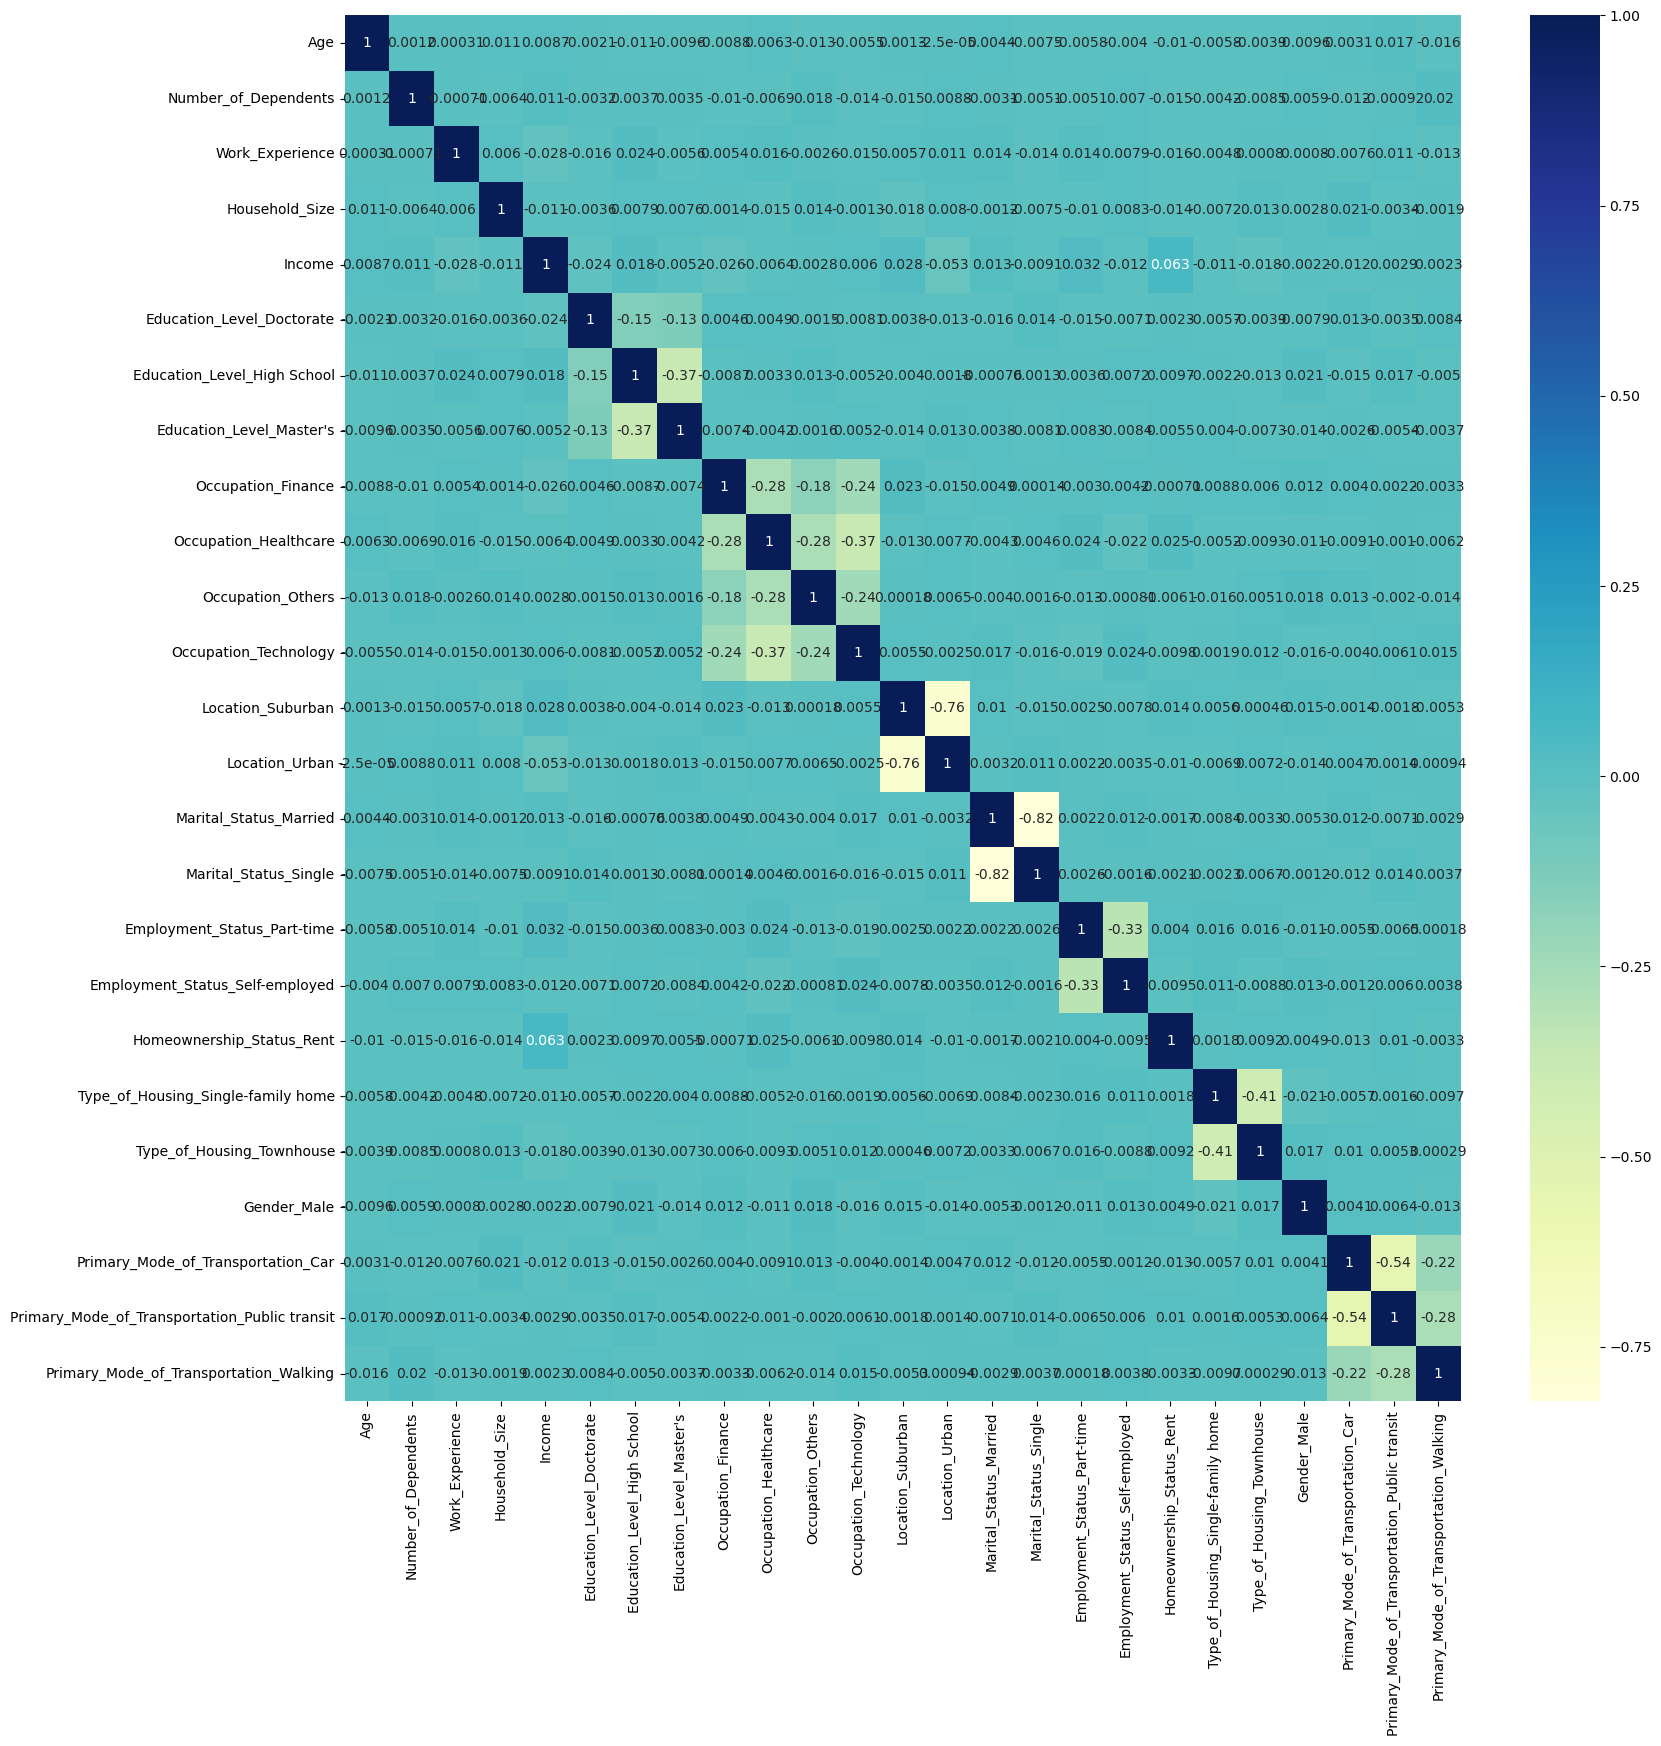

In [41]:
fig,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_corr,annot=True,cmap="YlGnBu");

In [42]:
df_corr_Income = df_corr[["Income"]].sort_values("Income",ascending=False)[1::]
df_corr_Income

,Income
Homeownership_Status_Rent,0.062561
Employment_Status_Part-time,0.031925
Location_Suburban,0.028269
Education_Level_High School,0.018451
Marital_Status_Married,0.012652
Number_of_Dependents,0.011413
Age,0.008739
Occupation_Technology,0.005978
Primary_Mode_of_Transportation_Public transit,0.002874
Occupation_Others,0.002822


In [43]:
df_corr_Income.values

array([[ 0.06256105],
       [ 0.03192461],
       [ 0.0282694 ],
       [ 0.01845103],
       [ 0.01265237],
       [ 0.01141281],
       [ 0.00873945],
       [ 0.00597833],
       [ 0.00287356],
       [ 0.00282178],
       [ 0.00230983],
       [-0.00221831],
       [-0.00519196],
       [-0.0063798 ],
       [-0.00905726],
       [-0.01052703],
       [-0.011356  ],
       [-0.0119824 ],
       [-0.01206855],
       [-0.01822466],
       [-0.0237259 ],
       [-0.02578376],
       [-0.02754083],
       [-0.05296801]])

In [44]:
df_corr_Income.index

Index(['Homeownership_Status_Rent', 'Employment_Status_Part-time',
       'Location_Suburban', 'Education_Level_High School',
       'Marital_Status_Married', 'Number_of_Dependents', 'Age',
       'Occupation_Technology',
       'Primary_Mode_of_Transportation_Public transit', 'Occupation_Others',
       'Primary_Mode_of_Transportation_Walking', 'Gender_Male',
       'Education_Level_Master's', 'Occupation_Healthcare',
       'Marital_Status_Single', 'Type_of_Housing_Single-family home',
       'Household_Size', 'Employment_Status_Self-employed',
       'Primary_Mode_of_Transportation_Car', 'Type_of_Housing_Townhouse',
       'Education_Level_Doctorate', 'Occupation_Finance', 'Work_Experience',
       'Location_Urban'],
      dtype='object')

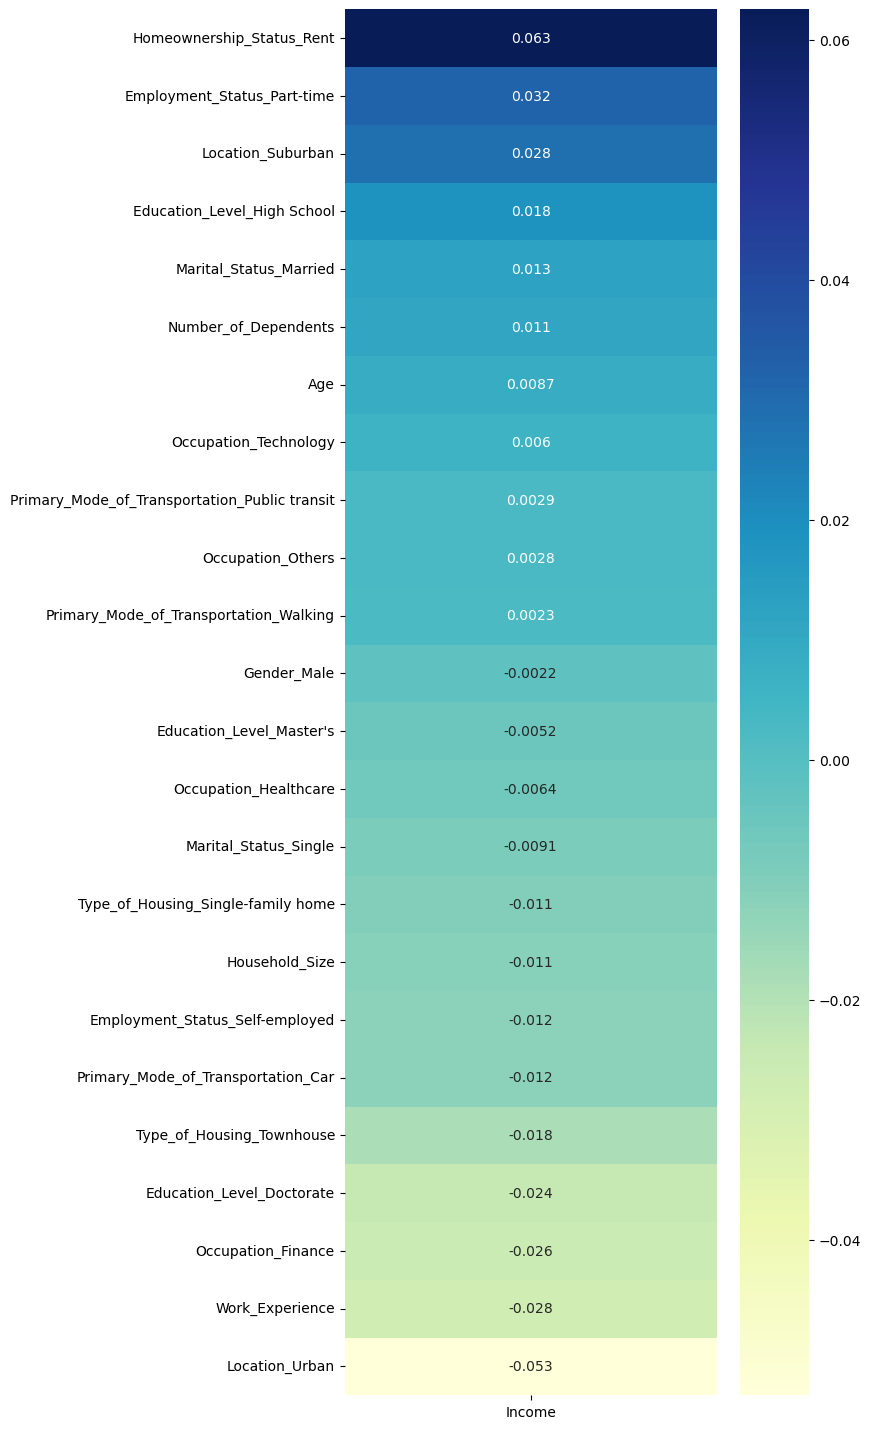

In [45]:
fig,ax=plt.subplots(figsize=(6,18))
sns.heatmap(df_corr_Income,annot=True,cmap="YlGnBu");

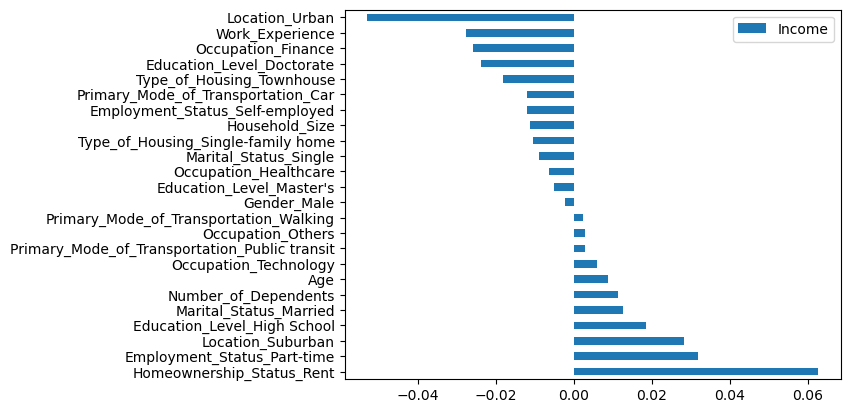

In [46]:
df_corr_Income.plot.barh();

In [47]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income']= le.fit_transform(df['Income'])

In [49]:
df['Age'].isnull().sum()

0

In [50]:
df['Age'].fillna(method = 'ffill')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14620\2409552794.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method = 'ffill')


0       56
1       69
2       46
3       32
4       60
        ..
9995    58
9996    23
9997    41
9998    44
9999    37
Name: Age, Length: 10000, dtype: int64

In [51]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
pca = PCA(n_components=5)

# Fit the PCA model to your standardized data
pca.fit(df)

# Transform your data to the reduced dimension
X_reduced = pca.transform(df)

ValueError: could not convert string to float: "Master's"

In [ ]:
sns.pairplot(df) 

In [ ]:
sns.lmplot(x= 'Income',y= 'Age',data =df)

In [ ]:
y = df['Income']

In [ ]:
x = df[['Age','Number_of_Dependents','Work_Experience','Household_Size']]

In [ ]:
from sklearn.model_selection import train_test_split #Datasplit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
x_train

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

In [ ]:
LinearRegression() 

In [ ]:
print(f'coefficients{lm.coef_}') 

In [ ]:
predictions = lm.predict(X_test) 

In [ ]:
predictions 

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y') 

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions))) 

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)